In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
employee = pd.read_csv('../data/employee.csv',
parse_dates=['HIRE_DATE', 'JOB_DATE'])

In [51]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [52]:
days_hired = pd.to_datetime('12-1-2016') - employee['HIRE_DATE']

In [53]:
days_hired.head()

0    3825 days
1    5979 days
2     667 days
3   12715 days
4   10027 days
Name: HIRE_DATE, dtype: timedelta64[ns]

In [54]:
one_year = pd.Timedelta(1, days = 365) 
# unit = "M", "Y" are deprecated use days instead
employee['YEARS_EXPERIENCE'] = days_hired / one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,3.304800e+17
1,2000-07-19,5.165856e+17
2,2015-02-03,5.762880e+16
3,1982-02-08,1.098576e+18
4,1989-06-19,8.663328e+17


In [55]:
#regplot is regression plot

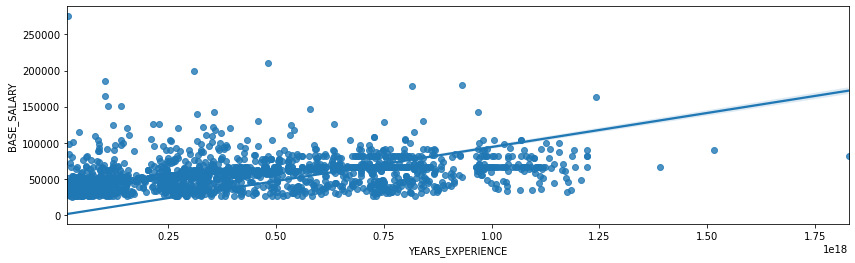

In [56]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
data=employee)
ax.figure.set_size_inches(14,4)

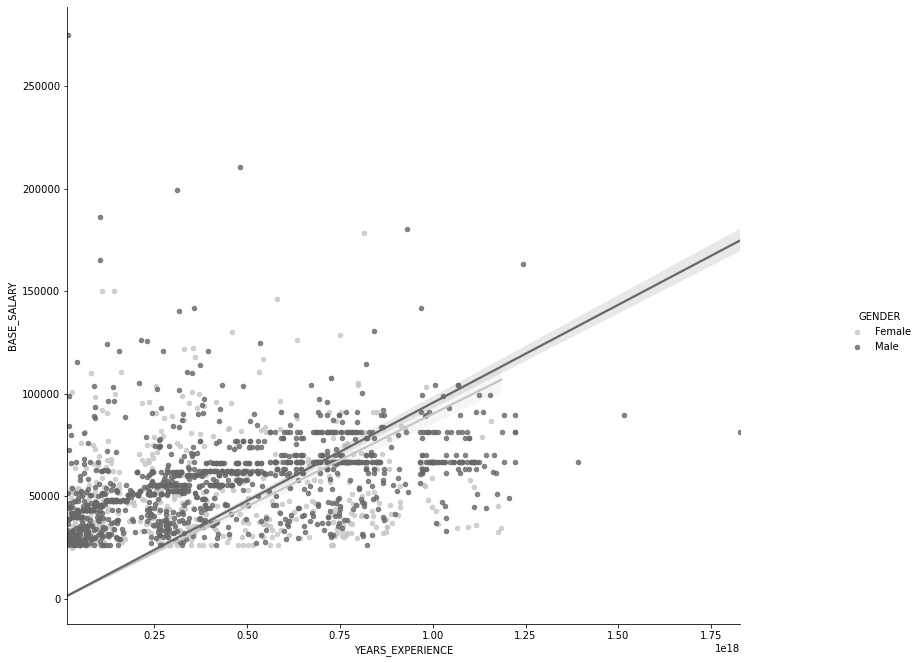

In [57]:
g = sns.lmplot('YEARS_EXPERIENCE', 'BASE_SALARY',
 hue='GENDER', palette='Greys',
 scatter_kws={'s':20}, data=employee)
g.fig.set_size_inches(14, 10)

In [58]:
type(g)

seaborn.axisgrid.FacetGrid

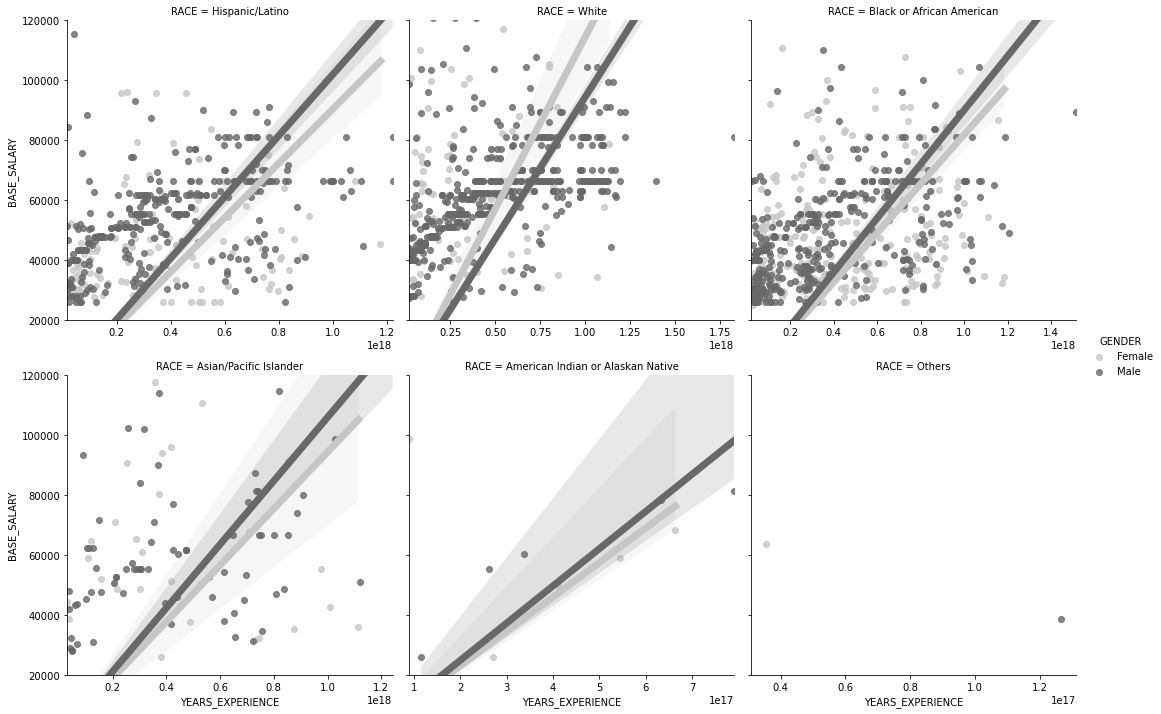

In [59]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
 hue='GENDER', col='RACE', col_wrap=3,
 palette='Greys', sharex=False,
 line_kws = {'linewidth':7},
 data=employee)
grid.set(ylim=(20000, 120000))

In [60]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)

In [61]:
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2['DEPARTMENT'].str.extract('(HPD|HFD)',
 expand=True)

In [62]:
emp2.shape

(968, 11)

In [63]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [64]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

In [65]:
common_depts = employee.groupby('DEPARTMENT') \
.filter(lambda x: len(x) > 50)

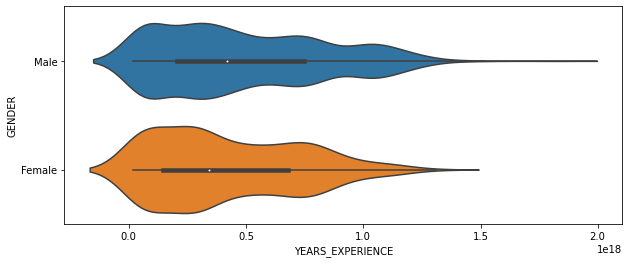

In [66]:
ax = sns.violinplot(x='YEARS_EXPERIENCE', y='GENDER',
 data=common_depts)
ax.figure.set_size_inches(10,4)

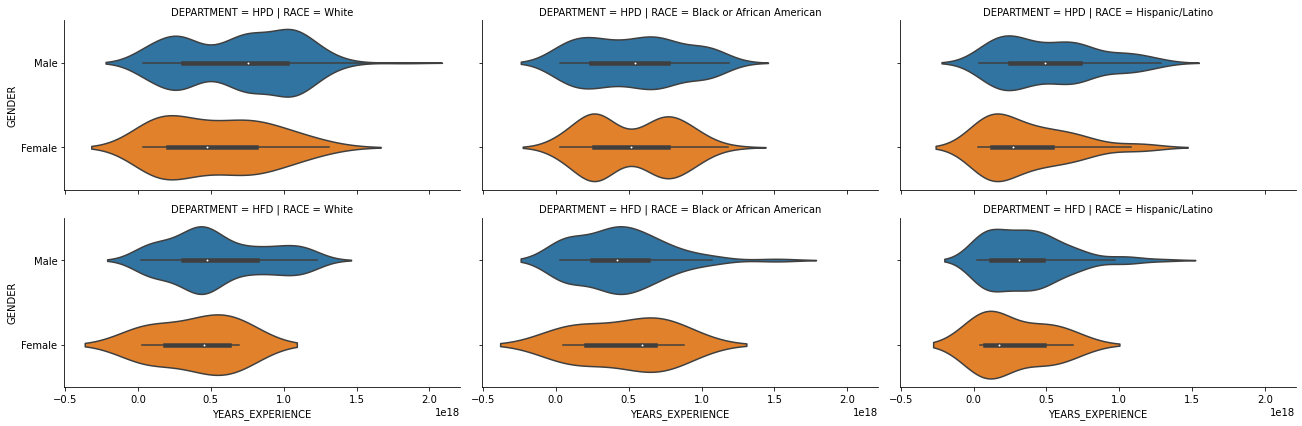

In [67]:
sns.factorplot(x='YEARS_EXPERIENCE', y='GENDER',
 col='RACE', row='DEPARTMENT',
 size=3, aspect=2,
 data=emp2, kind='violin')